In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Course Requirement 1: Read data in. 

In [4]:
#open imdb basics tsv.gz files with tab delimiter
df = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep='\t') 

#print column headers
my_list = list(df)
print(my_list)



C:\Users\dange\AppData\Local\Temp\ipykernel_3440\3668112850.py:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep='\t')


['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']


Course requirement 2: manipulate and clean data. How: Extracting specific columns from the existing dataframe created by reading in the tsv file. 

In [8]:
#create second dataframe, extracting specific columns for analysis
df2 = df[['tconst', 'titleType', 'primaryTitle']]

#save df to csv for future use
#df2.to_csv('title_basics.csv')


Course requirement 1 again: Read in more data. The first dataset had too much filler data, but none of the data I actually wanted to work with. So I had to bring in more. 

In [9]:
df3 = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', sep='\t')
print(df3.head)

<bound method NDFrame.head of             tconst  averageRating  numVotes
0        tt0000001            5.7      1921
1        tt0000002            5.8       260
2        tt0000003            6.5      1730
3        tt0000004            5.6       174
4        tt0000005            6.2      2544
...            ...            ...       ...
1243297  tt9916690            7.4         6
1243298  tt9916720            5.3       274
1243299  tt9916730            9.0         6
1243300  tt9916766            6.7        21
1243301  tt9916778            7.3        35

[1243302 rows x 3 columns]>


Course requirement 2 again: Create a new dataframe by combining the two datasets above. 

In [10]:
#merge extracted df and ratings df into one usable construct
df_merge = pd.merge(df2, df3, how = 'inner', on ='tconst')
print(df_merge.head)

<bound method NDFrame.head of             tconst  titleType                    primaryTitle  averageRating  \
0        tt0000001      short                      Carmencita            5.7   
1        tt0000002      short          Le clown et ses chiens            5.8   
2        tt0000003      short                  Pauvre Pierrot            6.5   
3        tt0000004      short                     Un bon bock            5.6   
4        tt0000005      short                Blacksmith Scene            6.2   
...            ...        ...                             ...            ...   
1243297  tt9916690  tvEpisode  Horrid Henry Delivers the Milk            7.4   
1243298  tt9916720      short                       The Nun 2            5.3   
1243299  tt9916730      movie                          6 Gunn            9.0   
1243300  tt9916766  tvEpisode                  Episode #10.15            6.7   
1243301  tt9916778  tvEpisode                          Escape            7.3   

         

Course requirement 2: More data cleaning, filtering out all non-movies from the dataset. There are a LOT of tv shows and shorts included with the IMDB dataset that I'm not interested in working with just yet. 

In [13]:
# filter out all Non-movie rows
df_merge2 = df_merge[df_merge['titleType'] == 'movie']
print(df_merge2.head)

<bound method NDFrame.head of             tconst titleType                 primaryTitle  averageRating  \
8        tt0000009     movie                   Miss Jerry            5.2   
325      tt0000502     movie                     Bohemios            4.2   
357      tt0000574     movie  The Story of the Kelly Gang            6.0   
364      tt0000591     movie             The Prodigal Son            5.1   
378      tt0000615     movie           Robbery Under Arms            4.3   
...            ...       ...                          ...            ...   
1243280  tt9916270     movie     Il talento del calabrone            5.8   
1243283  tt9916362     movie                        Coven            6.4   
1243287  tt9916428     movie          The Secret of China            3.8   
1243290  tt9916538     movie          Kuambil Lagi Hatiku            8.3   
1243299  tt9916730     movie                       6 Gunn            9.0   

         numVotes  
8             200  
325            14

Course requirement 3: 
Analysis 1. what is the length of the dataset? 

In [14]:
#start feature analysis here: length and shape of new dataframe/how much data do I have?
#dataset size
print(len(df_merge2)) 

#dataset shape
print(df_merge2.shape) 

282304
(282304, 5)


Course requirement 3: 
Analysis 2: What is the average rating of the movies in this dataset?

In [15]:
#Feature 2: Average ratings of dataset
df_ratings = df_merge2['averageRating'].mean() #find average or mean of averageRating column
print(df_ratings)

6.182014778394922


Course requirement 3:
Analysis 3: What are the basic stats for this dataset? How much info can I obtain from the describe function?

In [16]:
#Feature 3: all stats for this dataset
df_ratings2 = df_merge2.describe()
print(df_ratings2)

       averageRating      numVotes
count  282304.000000  2.823040e+05
mean        6.182015  3.561688e+03
std         1.362075  3.458187e+04
min         1.000000  5.000000e+00
25%         5.400000  1.900000e+01
50%         6.300000  6.000000e+01
75%         7.100000  3.070000e+02
max        10.000000  2.656326e+06


Course requirement 3:
Analsysis 4: What is the average number of votes each movie received?

In [17]:
#Feature 3: Average of number of votes each title received
df_votes = df_merge2['numVotes'].mean()
print(df_votes)

3561.688077391748


Course requirement 3:
Analysis 5: Filter out all movies with an average rating of less than 7.5

In [18]:
# filter rows with average rating less than 7.5
df_filtered_rating = df_merge2[df_merge2['averageRating'] >= 7.5]
print(df_filtered_rating)

            tconst titleType                  primaryTitle  averageRating  \
1028     tt0002305     movie                 Life of Villa            7.7   
1252     tt0003386     movie                   Sodoms Ende            7.7   
1331     tt0003748     movie               Captain Alvarez            8.0   
1345     tt0003819     movie          Dance of the Vampire            7.6   
1413     tt0004167     movie                     Jane Eyre            7.6   
...            ...       ...                           ...            ...   
1243221  tt9914642     movie                     Albatross            8.3   
1243222  tt9914644     movie  9/11: Escape from the Towers            8.3   
1243259  tt9915872     movie          The Last White Witch            7.7   
1243290  tt9916538     movie           Kuambil Lagi Hatiku            8.3   
1243299  tt9916730     movie                        6 Gunn            9.0   

         numVotes  
1028           27  
1252           15  
1331           

Course requirement 3:
Analysis 6: More filtering of data, removing anything with more than 75 votes. 

In [19]:
#filter rows with average number of votes <= 75
df_filtered_votes = df_filtered_rating[df_filtered_rating['numVotes'] <= 75]
print(df_filtered_votes)

            tconst titleType          primaryTitle  averageRating  numVotes
1028     tt0002305     movie         Life of Villa            7.7        27
1252     tt0003386     movie           Sodoms Ende            7.7        15
1331     tt0003748     movie       Captain Alvarez            8.0        17
1345     tt0003819     movie  Dance of the Vampire            7.6        20
1413     tt0004167     movie             Jane Eyre            7.6        19
...            ...       ...                   ...            ...       ...
1243203  tt9913936     movie              Paradise            7.5        58
1243221  tt9914642     movie             Albatross            8.3        42
1243259  tt9915872     movie  The Last White Witch            7.7         8
1243290  tt9916538     movie   Kuambil Lagi Hatiku            8.3         6
1243299  tt9916730     movie                6 Gunn            9.0         6

[33801 rows x 5 columns]


Course requirement 3:
Analysis 7? Sort data in descending order. 

In [20]:
#sort data in descending order and print head
sorted_df = df_filtered_votes.sort_values(by=['averageRating'], ascending=False)
print(sorted_df)

            tconst titleType                        primaryTitle  \
609904  tt13458442     movie          Vegan on a Jet Plane: Bali   
606365  tt13388966     movie                       A Better Life   
446993  tt10106416     movie           Honor Project Documentary   
635814  tt14051362     movie                                Raka   
955511   tt3835096     movie     The Film That Changed the World   
...            ...       ...                                 ...   
732854   tt1688465     movie               Terra Deu, Terra Come   
81080    tt0110007     movie                         Hei shan lu   
192333   tt0334231     movie         Reno: Rebel Without a Pause   
192340   tt0334262     movie                               Ru yi   
458714  tt10329696     movie  Self Discovery for Social Survival   

        averageRating  numVotes  
609904           10.0        13  
606365           10.0        55  
446993           10.0         8  
635814           10.0         8  
955511       

Course requirement 4: Plot data with matplotlib. I created a histogram using the average score and number of votes. 

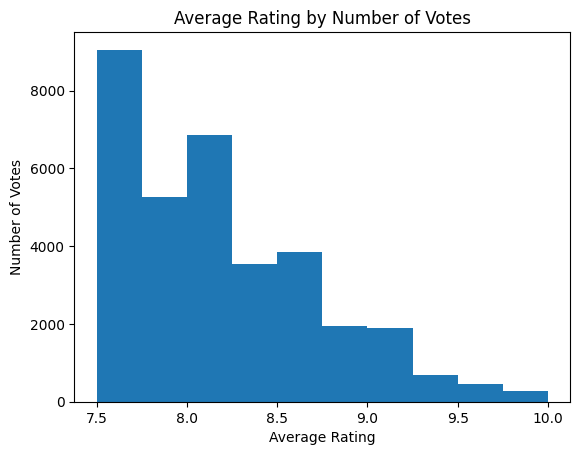

In [22]:
# create histogram of sorted data
plt.hist(sorted_df['averageRating'])

plt.title('Average Rating by Number of Votes')
plt.ylabel('Number of Votes')
plt.xlabel('Average Rating')
plt.show() 

Course requirement 3:
I filtered out everything that scored a 10 out of sheer curiosity. 

In [23]:
# filter rows with average rating equals 10
df_filtered_rating2 = df_merge2[df_merge2['averageRating'] == 10]
print(df_filtered_rating2)

            tconst titleType  \
75823    tt0103649     movie   
109973   tt0160316     movie   
124665   tt0189001     movie   
144360   tt0231636     movie   
148879   tt0242401     movie   
...            ...       ...   
1152962  tt7504100     movie   
1168907  tt7860124     movie   
1183263  tt8215820     movie   
1201184  tt8695934     movie   
1223058  tt9247516     movie   

                                              primaryTitle  averageRating  \
75823                                        All I Know Is           10.0   
109973                                  Girls Loving Girls           10.0   
124665                               Pinagbuklod ng langit           10.0   
144360                            Gatilleros del Rio Bravo           10.0   
148879                                       Daku Mansingh           10.0   
...                                                    ...            ...   
1152962                                      Rooftop Story           10.0   

Course requirement 4: Create a second plot. I created a scatterplot with matplotlib. 

<function matplotlib.pyplot.show(close=None, block=None)>

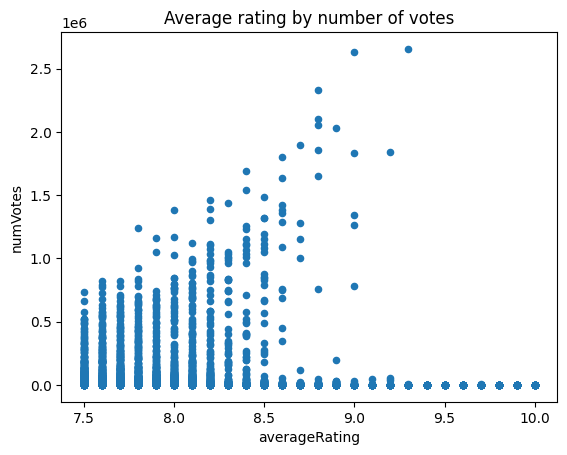

In [36]:
df_filtered_rating.plot(kind='scatter', x ='averageRating', y = 'numVotes')
plt.title('Average rating by number of votes')

plt.show


Bonus analysis! I wanted to find any horror movies that have a score of 10, but not a lot of votes. 

In [40]:
#create new dataframe, including genre information
df_horror = df[['tconst', 'titleType', 'primaryTitle', 'genres']]
print(df_horror.head)



<bound method NDFrame.head of             tconst  titleType               primaryTitle  \
0        tt0000001      short                 Carmencita   
1        tt0000002      short     Le clown et ses chiens   
2        tt0000003      short             Pauvre Pierrot   
3        tt0000004      short                Un bon bock   
4        tt0000005      short           Blacksmith Scene   
...            ...        ...                        ...   
9342533  tt9916848  tvEpisode              Episode #3.17   
9342534  tt9916850  tvEpisode              Episode #3.19   
9342535  tt9916852  tvEpisode              Episode #3.20   
9342536  tt9916856      short                   The Wind   
9342537  tt9916880  tvEpisode  Horrid Henry Knows It All   

                             genres  
0                 Documentary,Short  
1                   Animation,Short  
2          Animation,Comedy,Romance  
3                   Animation,Short  
4                      Comedy,Short  
...                  

Merging two datasets again, this time including genre information. 

In [41]:
#merge extracted df and ratings df into one usable construct
df_horror_merge = pd.merge(df_horror, df3, how = 'inner', on ='tconst')
print(df_horror_merge.head)

<bound method NDFrame.head of             tconst  titleType                    primaryTitle  \
0        tt0000001      short                      Carmencita   
1        tt0000002      short          Le clown et ses chiens   
2        tt0000003      short                  Pauvre Pierrot   
3        tt0000004      short                     Un bon bock   
4        tt0000005      short                Blacksmith Scene   
...            ...        ...                             ...   
1243297  tt9916690  tvEpisode  Horrid Henry Delivers the Milk   
1243298  tt9916720      short                       The Nun 2   
1243299  tt9916730      movie                          6 Gunn   
1243300  tt9916766  tvEpisode                  Episode #10.15   
1243301  tt9916778  tvEpisode                          Escape   

                              genres  averageRating  numVotes  
0                  Documentary,Short            5.7      1921  
1                    Animation,Short            5.8       260

Filtering out all non-movies again

In [44]:
# filter out all Non-movie rows
df_horror_2 = df_horror_merge[df_horror_merge['titleType'] == 'movie'] 
print(df_horror_2.head)

<bound method NDFrame.head of             tconst titleType                 primaryTitle  \
8        tt0000009     movie                   Miss Jerry   
325      tt0000502     movie                     Bohemios   
357      tt0000574     movie  The Story of the Kelly Gang   
364      tt0000591     movie             The Prodigal Son   
378      tt0000615     movie           Robbery Under Arms   
...            ...       ...                          ...   
1243280  tt9916270     movie     Il talento del calabrone   
1243283  tt9916362     movie                        Coven   
1243287  tt9916428     movie          The Secret of China   
1243290  tt9916538     movie          Kuambil Lagi Hatiku   
1243299  tt9916730     movie                       6 Gunn   

                             genres  averageRating  numVotes  
8                           Romance            5.2       200  
325                              \N            4.2        14  
357      Action,Adventure,Biography            6

In [48]:
# filter out all Horror movie rows
df_horror_3 = df_horror_2[df_horror_2['genres'] == 'Horror'] 
print(df_horror_3.head)

<bound method NDFrame.head of             tconst titleType                 primaryTitle  genres  \
1387     tt0004026     movie                    The Golem  Horror   
1498     tt0004573     movie           Ein seltsamer Fall  Horror   
1799     tt0006238     movie           Zhenshchina vampir  Horror   
2124     tt0007983     movie                       Furcht  Horror   
2147     tt0008099     movie     Hilde Warren und der Tod  Horror   
...            ...       ...                          ...     ...   
1242745  tt9900552     movie  The Sacred Riana: Beginning  Horror   
1242834  tt9903890     movie             The Curse of EVE  Horror   
1242875  tt9904820     movie        American Terror Story  Horror   
1242915  tt9906128     movie             Leak (Penangkeb)  Horror   
1243037  tt9910530     movie                   Svartklubb  Horror   

         averageRating  numVotes  
1387               6.7      1182  
1498               5.8        14  
1799               7.6        37  
2

Filter out all horror movies with a score of 10. 

In [51]:
# filter rows with average rating greater than or equal to 8.5
df_filtered_horror = df_horror_3[df_horror_3['averageRating'] >= 8.5]
print(df_filtered_horror)

             tconst titleType                                 primaryTitle  \
216858    tt0391842     movie                                  Camp D.O.A.   
240827    tt0449227     movie                                  Don't Blink   
435937    tt0976146     movie                                       Martyr   
453724   tt10234010     movie                  Dark Ditties Presents 'Dad'   
458311   tt10323428     movie                                   Evil Lurks   
...             ...       ...                                          ...   
1130930   tt6990316     movie  Phantom of the Opera at the London Coliseum   
1155485   tt7556244     movie                                     Grinders   
1157476   tt7600566     movie      Dark Ditties Presents 'Finders Keepers'   
1191713   tt8428550     movie                                       Canvas   
1222239   tt9221802     movie                             Seton Falls Park   

         genres  averageRating  numVotes  
216858   Horror     

In [56]:
# filter rows with less than 75 votes
df_horror_votes = df_filtered_horror[df_filtered_horror['numVotes'] <= 75]
print(df_horror_votes)


             tconst titleType                                 primaryTitle  \
216858    tt0391842     movie                                  Camp D.O.A.   
240827    tt0449227     movie                                  Don't Blink   
435937    tt0976146     movie                                       Martyr   
453724   tt10234010     movie                  Dark Ditties Presents 'Dad'   
458311   tt10323428     movie                                   Evil Lurks   
474867   tt10638522     movie                                   Talk to Me   
481267   tt10763342     movie                                  I'm Haunted   
490242   tt10943762     movie                        The Red Tide Massacre   
510805   tt11319994     movie                                     Remnants   
516646   tt11436686     movie                            St. Patrick's Day   
547532    tt1207918     movie                       At lumaganap ang lagim   
577261   tt12767794     movie                                   

Filter out any movies with a score of 9.5 or higher.

And now I have a list of new horror movies to watch. :)

In [59]:
# filter rows with average rating of 9.5
df_horror_10 = df_horror_votes[df_horror_votes['averageRating'] >= 9.5]
print(df_horror_10)

            tconst titleType           primaryTitle  genres  averageRating  \
458311  tt10323428     movie             Evil Lurks  Horror            9.8   
490242  tt10943762     movie  The Red Tide Massacre  Horror            9.7   
852647   tt2346094     movie        Girls on a Boat  Horror            9.5   

        numVotes  
458311         8  
490242         9  
852647        14  
